Load a set of tiff with same xps value from directory, then average and manually draw out the data mask.

In [1]:
import sys
import os
# Get the current working directory (where the notebook is running)
current_dir = os.getcwd()
# Go up one level to project root (adjust based on your structure)
project_root = os.path.dirname(current_dir)
sys.path.insert(0, project_root)

In [3]:
from pathlib import Path
from scripts.full_directory_processor import DirectoryProcessor
from src.io.tiff_import import TiffLoader
from src.utils.data_mask import data_to_color_png, bw_png_to_mask_ndarray
from src.io.quick_plot import plot_ndarray

In [3]:
background_dir = Path(r'C:\Users\86177\Desktop\results\0809')
background_path = background_dir / "background.tiff"
background_data = TiffLoader(background_path.parent, background_path.name)
print(f"Loaded background from: {background_path}")

Loaded background from: C:\Users\86177\Desktop\results\0809\background.tiff


In [4]:
Preprocessor = DirectoryProcessor(
    result_directory= r"C:\Users\86177\Desktop\results\0809",
    data_directory= r"E:\20250809\10_water_longscan_IR52deg_6\fist_AndorEMCCD",
    xps_grouping_param= [],
    xray_removal_param= [15,0.7],
    center_fitting_param= [40,200,512,512],
    azimuthal_avg_param= [512,512],
    background_directory= "default",
    data_mask_directory= "default"
)

preprocess_data = Preprocessor.preprocess_screening(group_size=100)

2025-11-13 22:23:53,820 - INFO - Starting preprocess screening with 100 images
2025-11-13 22:23:53,821 - INFO - Initializing processing masks...
2025-11-13 22:23:54,414 - INFO - Masks initialized successfully
2025-11-13 22:23:54,414 - INFO - Initializing background and data mask...
2025-11-13 22:23:54,425 - INFO - Loaded background from: C:\Users\86177\Desktop\results\0809\background.tiff
2025-11-13 22:23:54,425 - INFO - Default data mask file not found under: C:\Users\86177\Desktop\results\0809\background.tiff, proceed without masking!
2025-11-13 22:23:54,431 - INFO - Numbered test XPS group selection...



SELECT TEST XPS GROUP
 1. XPS 189.84000: 1410 files
 2. XPS 188.94000: 1400 files
 3. XPS 189.69000: 1400 files
 4. XPS 189.03750: 1370 files
 5. XPS 189.13500: 1370 files
 6. XPS 188.98500: 1360 files
 7. XPS 189.06500: 1360 files
 8. XPS 188.95500: 1350 files
 9. XPS 188.97000: 1350 files
10. XPS 189.03000: 1350 files
11. XPS 189.00000: 1330 files
12. XPS 189.01500: 1320 files
13. XPS 189.06000: 1320 files
14. XPS 189.06750: 1320 files
15. XPS 189.11000: 1320 files
16. XPS 189.10625: 1300 files
17. XPS 189.11250: 1290 files
18. XPS 189.14250: 1290 files
19. XPS 189.10375: 1280 files
20. XPS 189.08875: 1260 files
21. XPS 189.09125: 1250 files
22. XPS 189.09500: 1240 files
23. XPS 189.09750: 1220 files
24. XPS 189.12875: 1220 files
25. XPS 189.08250: 1200 files
26. XPS 189.08000: 1170 files
27. XPS 189.04500: 1150 files
28. XPS 189.12000: 1130 files
29. XPS 189.12500: 1100 files
30. XPS 189.07000: 1090 files
31. XPS 189.05500: 1010 files
32. XPS 189.07375: 1000 files
33. XPS 189.11500

2025-11-13 22:23:58,536 - INFO - Configuration saved to C:\Users\86177\Desktop\results\0809\preprocessing_screening_config\config.csv
2025-11-13 22:23:58,536 - INFO - Preprocessing test group - computing mean of 100 images
2025-11-13 22:23:58,536 - INFO - Randomly sampled 50 files for X-ray statistics precomputation


✓ Selected group 1: XPS 189.84000 with 1410 files
Limited to 100 evenly spaced files (from 1410 total)


2025-11-13 22:24:01,462 - INFO - X-ray statistics precomputation completed. Center region (40x40) excluded.


✓ Mean image computed from 100 images


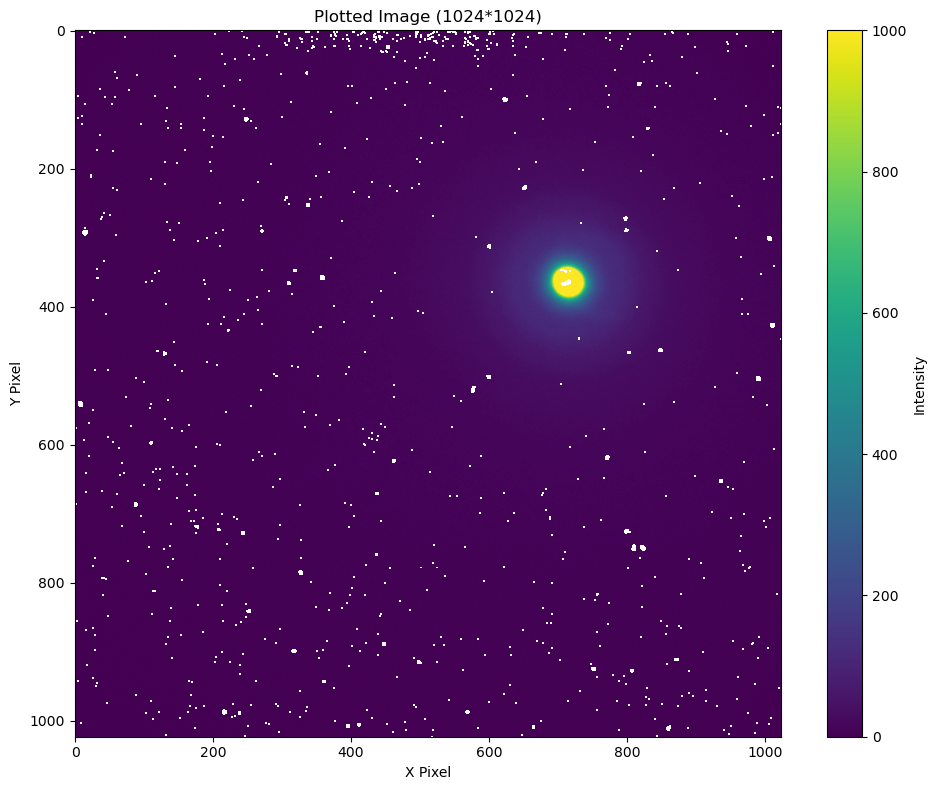

In [12]:
plot_ndarray(preprocess_data,0,1000)

In [13]:
data_to_color_png(data_array=preprocess_data, 
                  filename=r"C:\Users\86177\Desktop\results\0809\preprocess_center.png",
                  manual_min = 0,
                  manual_max= 1000)

Generating color map image 'C:\Users\86177\Desktop\results\0809\preprocess_center.png' using 'viridis'...
Successfully saved color-mapped image to C:\Users\86177\Desktop\results\0809\preprocess_center.png


Loading mask image 'C:\Users\86177\Desktop\results\0809\preprocess_bkg_mask.png'...
Successfully converted mask to NumPy array of shape (1024, 1024) and dtype int32
Successfully saved array to: C:\Users\86177\Desktop\results\0809\background_mask.tiff
  - Shape: (1024, 1024)
  - Data type: int32
  - File size: 0.06 MB


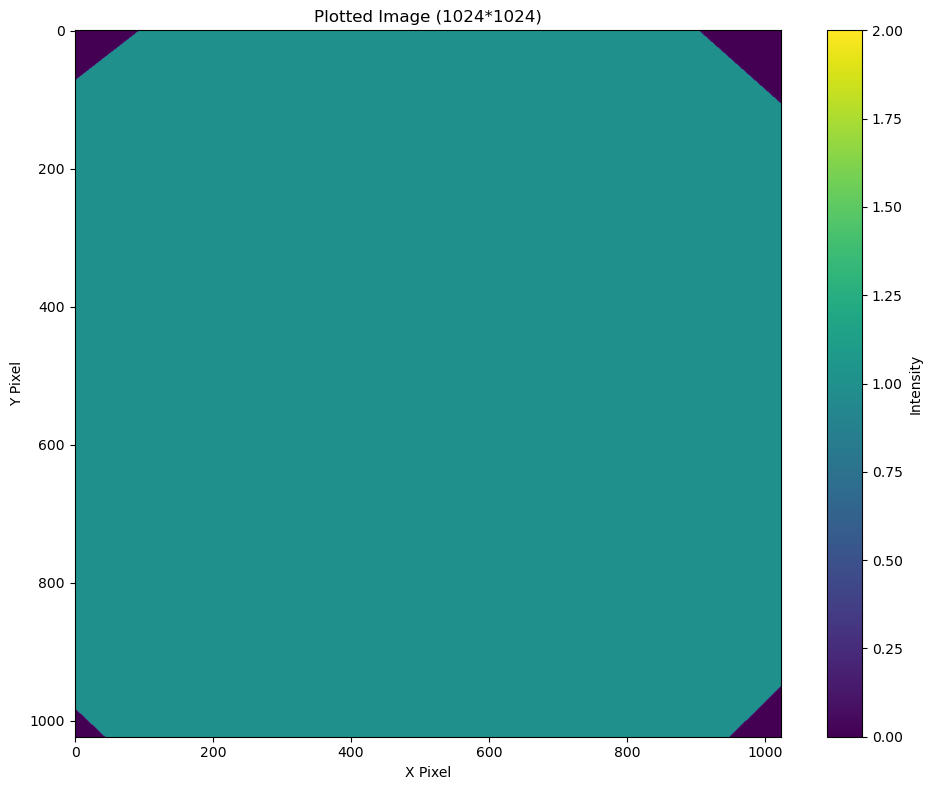

In [4]:
from src.io.result_save import save_as_tiff
data_mask = bw_png_to_mask_ndarray(filename=r"C:\Users\86177\Desktop\results\0809\preprocess_bkg_mask.png")
save_as_tiff(data_mask, r'C:\Users\86177\Desktop\results\0809\background_mask.tiff')
plot_ndarray(data_mask,0,2)